### Purpose of this project will be to explore a bit the heart attack prediction dataset crossing some of its variables and then enriching this analysis by crossing this data with an air polution score and a happiness index scrapped from the web.

In [23]:
#let's start by importing some libraries I'll be working with right away:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#encoding the dataframe I'll be working with:
heart_attack_dataframe = pd.read_csv("../Data/heart_attack_prediction_dataset.csv")
heart_attack_dataframe.sample(3)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
4380,PWK6893,62,Male,340,117/110,46,1,1,1,0,1,11.646601,Unhealthy,0,0,1,5.998700,164026,27.368843,95,0,5,India,Asia,Northern Hemisphere,1
633,TZH4787,68,Male,167,161/65,89,1,0,1,0,1,9.903731,Healthy,1,1,3,2.284667,115803,20.407775,124,4,8,Colombia,South America,Northern Hemisphere,1
236,EAB3469,86,Male,225,165/71,48,1,1,1,0,0,18.210582,Unhealthy,0,1,5,5.940738,149205,35.276043,558,3,4,Nigeria,Africa,Northern Hemisphere,0


In [25]:
#checking for some information so I know what/how to clean
heart_attack_dataframe.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [26]:
#no nulls, which is great, what's the type of the columns?
heart_attack_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

##### Note from Ricardo: well if I'm honest, I've chosen a dataset that was very much clean, organized and maintained and I'm not doing much here

## in particular I will be wanting to work with: Sedentary Hours Per Day, Stress Level, Sleep Hours Per Day and Heart Attack Risk

### 1. Checking the relation between Sedentary Hours Per Day and Heart Attack Risk

In [27]:
#grouping the sedentary hours per day so then I calculate an average per group
heart_attack_dataframe["Sedentary Hours Per Day Grouped"] = heart_attack_dataframe["Sedentary Hours Per Day"].apply(np.ceil)
heart_attack_dataframe.sample(3)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Sedentary Hours Per Day Grouped
7029,JJI9592,49,Male,148,138/87,76,0,1,1,1,0,10.657917,Unhealthy,0,1,7,2.501026,228865,33.663634,359,1,4,China,Asia,Northern Hemisphere,0,3.0
6420,INC2693,45,Male,278,135/78,101,1,1,1,1,1,11.779654,Average,1,0,5,1.555805,78965,19.059318,536,3,10,Spain,Europe,Southern Hemisphere,0,2.0
2777,MNW7180,23,Male,251,93/70,81,0,0,1,1,1,16.293833,Healthy,1,0,1,9.683450,122433,23.681910,790,2,7,United Kingdom,Europe,Northern Hemisphere,0,10.0


In [28]:
#grouping and representing into a table / dataframe
heart_att_sedent_hours = heart_attack_dataframe.groupby("Sedentary Hours Per Day Grouped").aggregate({"Heart Attack Risk":"mean"})
heart_att_sedent_hours

,Heart Attack Risk
Sedentary Hours Per Day Grouped,
1.0,0.376197
2.0,0.373219
3.0,0.339921
4.0,0.348006
5.0,0.368000
6.0,0.343303
7.0,0.354309
8.0,0.365330
9.0,0.374462


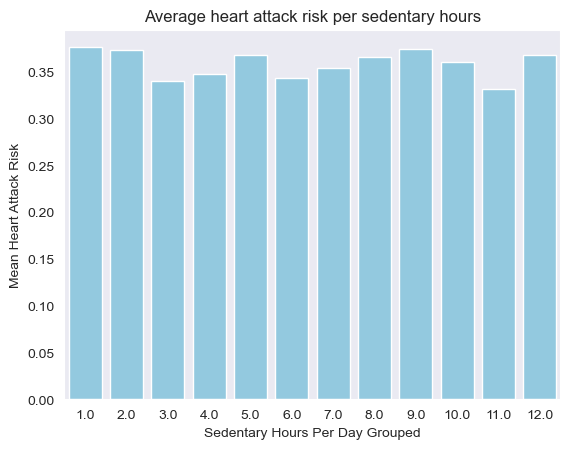

In [127]:
#now plotting this!
sns.set_style("dark")
sns.barplot(x=heart_att_sedent_hours.index, y=heart_att_sedent_hours["Heart Attack Risk"], color="skyblue")
plt.title("Average heart attack risk per sedentary hours")
plt.xlabel("Sedentary Hours Per Day Grouped")
plt.ylabel("Mean Heart Attack Risk")
plt.savefig("../Figures/Average heart attack risk per sedentary hours.png")
plt.show()

### 2. Checking the relation between Stress Level and Heart Attack Risk

In [30]:
#doing essentially the same I did for the sedentary hours but now for the stress levels:
heart_att_stress_levels = heart_attack_dataframe.groupby("Stress Level").aggregate({"Heart Attack Risk":"mean"})
heart_att_stress_levels

,Heart Attack Risk
Stress Level,
1,0.350289
2,0.361446
3,0.365207
4,0.343956
5,0.368605
6,0.376608
7,0.372093
8,0.353811
9,0.341601


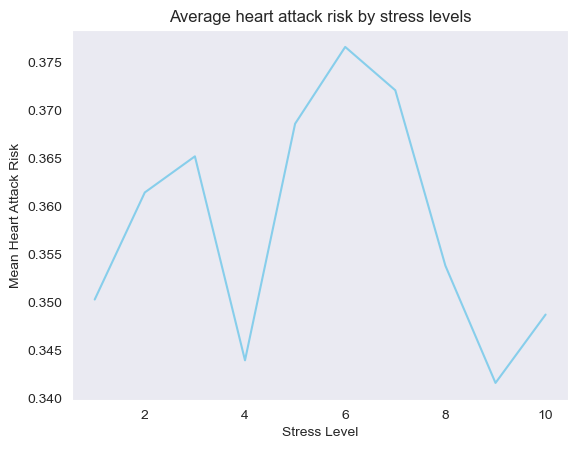

In [31]:
#with the plotting now
sns.set_style("dark")
sns.lineplot(x=heart_att_stress_levels.index, y=heart_att_stress_levels["Heart Attack Risk"], color="skyblue")
plt.title("Average heart attack risk by stress levels")
plt.xlabel("Stress Level")
plt.ylabel("Mean Heart Attack Risk")
plt.savefig("../Figures/Average heart attack risk by stress levels.png")
plt.show()

### 3. and now for Sleep Hours Per Day

In [32]:
heart_att_sleep_hours_day = heart_attack_dataframe.groupby("Sleep Hours Per Day").aggregate({"Heart Attack Risk":"mean"})
heart_att_sleep_hours_day

,Heart Attack Risk
Sleep Hours Per Day,
4,0.363251
5,0.365796
6,0.367555
7,0.357480
8,0.373447
9,0.347315
10,0.332560


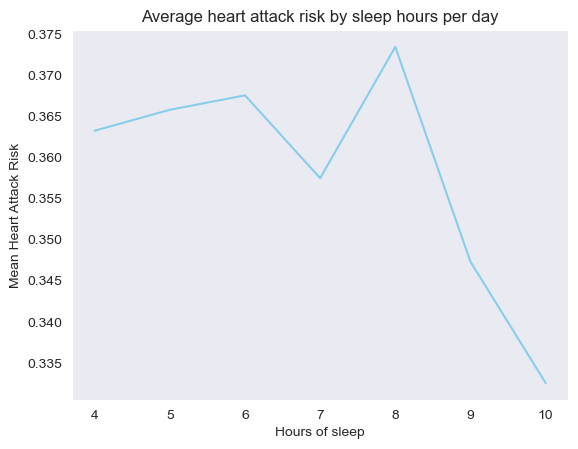

In [33]:
#with the plotting now
sns.set_style("dark")
sns.lineplot(x=heart_att_sleep_hours_day.index, y=heart_att_sleep_hours_day["Heart Attack Risk"], color="skyblue")
plt.title("Average heart attack risk by sleep hours per day")
plt.xlabel("Hours of sleep")
plt.ylabel("Mean Heart Attack Risk")
plt.savefig("../Figures/Average heart attack risk by sleep hours per day.png")
plt.show()

In [34]:
#I also want to create a visualization for the countries with the biggest prevalence of heart attack risks
#first calculating a proportion for this:
heart_attacks_by_country = (heart_attack_dataframe.groupby("Country")["Heart Attack Risk"].sum() / heart_attack_dataframe.groupby("Country")["Heart Attack Risk"].count() * 100)
heart_attacks_by_country

#I wanna know how many entrries are there per country
count_of_entries_by_country = heart_attack_dataframe["Country"].value_counts()
count_of_entries_by_country

Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: Country, dtype: int64

In [35]:
#ok, the entries were really just for me to understand whether the datasets were drastically different per country. They'r enot

In [36]:
heart_attacks_by_country

Country
Argentina         36.942675
Australia         37.416481
Brazil            35.281385
Canada            35.909091
China             35.550459
Colombia          37.762238
France            35.201794
Germany           36.058700
India             31.310680
Italy             31.554524
Japan             33.256351
New Zealand       34.712644
Nigeria           39.732143
South Africa      33.882353
South Korea       39.853301
Spain             34.883721
Thailand          37.616822
United Kingdom    35.010941
United States     39.523810
Vietnam           34.823529
Name: Heart Attack Risk, dtype: float64

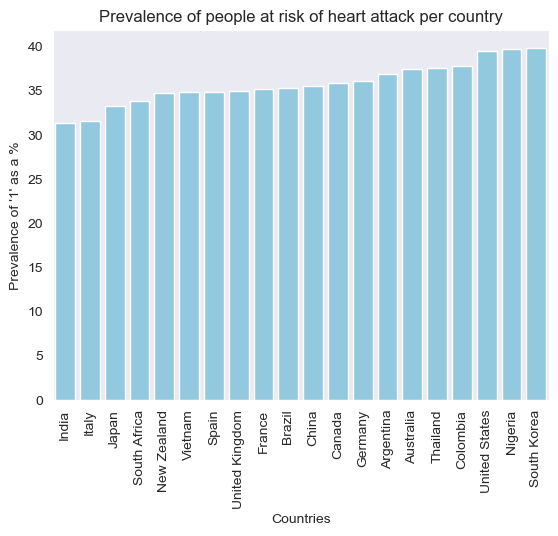

In [134]:
sns.set_style("dark")
heart_attacks_by_country_sorted = heart_attacks_by_country.sort_values(ascending=True)
sns.barplot(x=heart_attacks_by_country_sorted.index.values, y=heart_attacks_by_country_sorted, color="skyblue")
plt.title("Prevalence of people at risk of heart attack per country")
plt.xlabel("Countries")
plt.ylabel("Prevalence of '1' as a %")
plt.xticks(rotation=90) 
plt.savefig("../Figures/Prevalence of people at risk of heart attack per country.png")
plt.show()

## Now that we analysed some of this data, I want to input some external data and cross it with the prevalence of heart attack risks. Assess whether countries with higher air quality correlate to less sedentary hours per day and if the Angriness index correlates to a lower prevalence of heart attack risk.

1. Correlating air quality and sedentarism. The website we-re scrapping from is [this one, IQAir](https://www.iqair.com/world-most-polluted-countries)

In [38]:
#scrapping the data from the web
from bs4 import BeautifulSoup # pip install beautifulsoup4
import pandas as pd
import requests
import re

air_quality_url = "https://www.iqair.com/world-most-polluted-countries"
airq_request = requests.get(air_quality_url)
airq_request
airq_soup = BeautifulSoup(airq_request.content, "html.parser")

In [39]:
#getting the list of countries. 
airq_countries = airq_soup.find_all("div", {"class":"country-name"})
airq_countries_cleaned =  [i.getText().strip() for i in airq_countries]
airq_countries_cleaned

['Chad',
 'Iraq',
 'Pakistan',
 'Bahrain',
 'Bangladesh',
 'Burkina Faso',
 'Kuwait',
 'India',
 'Egypt',
 'Tajikistan',
 'United Arab Emirates',
 'Sudan',
 'Rwanda',
 'Qatar',
 'Saudi Arabia',
 'Nepal',
 'Uganda',
 'Nigeria',
 'Bosnia Herzegovina',
 'Uzbekistan',
 'Iran',
 'Armenia',
 'Ethiopia',
 'Kyrgyzstan',
 'China',
 'Indonesia',
 'Ghana',
 'Mongolia',
 'Laos',
 'Vietnam',
 'North Macedonia',
 'Gabon',
 'Serbia',
 'Zambia',
 'Myanmar',
 'Madagascar',
 'Croatia',
 'Peru',
 'South Africa',
 'Kazakhstan',
 'Moldova',
 'Ivory Coast',
 'Chile',
 'Turkmenistan',
 'Turkey',
 'Sri Lanka',
 'Senegal',
 'Syria',
 'Mexico',
 'Greece',
 'Azerbaijan',
 'Italy',
 'Israel',
 'Guatemala',
 'Bulgaria',
 'South Korea',
 'Thailand',
 'Algeria',
 'Malaysia',
 'Romania',
 'Georgia',
 'Poland',
 'Colombia',
 'Montenegro',
 'Cyprus',
 'Democratic Republic of the Congo',
 'Macao SAR',
 'Slovenia',
 'Philippines',
 'Kosovo',
 'Slovakia',
 'Hong Kong SAR',
 'Albania',
 'El Salvador',
 'Czech Republic',
 '

In [40]:
#noooice. Now let's get them values!
airq_score_quality = airq_soup.find_all("td", {"class":"mat-cell cdk-cell cdk-column-avg2022 mat-column-avg2022"})
airq_score_quality_cleaned = [i.getText().strip() for i in airq_score_quality]
airq_score_quality_cleaned

['89.7',
 '80.1',
 '70.9',
 '66.6',
 '65.8',
 '63',
 '55.8',
 '53.3',
 '46.5',
 '46',
 '45.9',
 '44.6',
 '44',
 '42.5',
 '41.5',
 '40.1',
 '39.6',
 '36.9',
 '33.6',
 '33.5',
 '32.5',
 '31.4',
 '31.3',
 '31.1',
 '30.6',
 '30.4',
 '30.2',
 '29.5',
 '27.6',
 '27.2',
 '25.6',
 '25',
 '24.7',
 '24.6',
 '24.3',
 '23.7',
 '23.5',
 '23.5',
 '23.4',
 '23',
 '22.6',
 '22.5',
 '22.2',
 '21.6',
 '21.1',
 '20.7',
 '20.4',
 '20',
 '19.5',
 '19',
 '18.9',
 '18.9',
 '18.8',
 '18.6',
 '18.3',
 '18.3',
 '18.1',
 '17.8',
 '17.7',
 '17.2',
 '17',
 '16.3',
 '15.7',
 '15.7',
 '15.6',
 '15.5',
 '15.4',
 '15.1',
 '14.9',
 '14.7',
 '14.5',
 '14.5',
 '14.5',
 '14.2',
 '13.4',
 '13.4',
 '13.3',
 '13.2',
 '12.6',
 '12.6',
 '12.2',
 '11.7',
 '11.5',
 '11.5',
 '11.3',
 '11.2',
 '11',
 '11',
 '10.9',
 '10.9',
 '10.8',
 '10.6',
 '10.2',
 '10.1',
 '10',
 '9.7',
 '9.1',
 '9',
 '8.9',
 '8.9',
 '8.9',
 '8.8',
 '8.6',
 '8.3',
 '8.3',
 '8.1',
 '7.9',
 '7.7',
 '7.5',
 '7.4',
 '7.4',
 '7.3',
 '7',
 '7',
 '6.2',
 '5.6',
 '5.4

In [44]:
#now that I have them both, let's create: 1 a dictionary so that 2 I can create a df with that:
#1 
airq_per_country_dict = {"Country":airq_countries_cleaned,"Air quality score":airq_score_quality_cleaned}
airq_per_country_dict
#2
airq_per_country_df = pd.DataFrame(airq_per_country_dict)
airq_per_country_df

,Country,Air quality score
0,Chad,89.7
1,Iraq,80.1
2,Pakistan,70.9
3,Bahrain,66.6
4,Bangladesh,65.8
...,...,...
126,"Bonaire, Saint Eustatius and Saba",3.3
127,Bermuda,3
128,U.S. Virgin Islands,2.9
129,French Polynesia,2.5


In [52]:
#now I want to cross this air quality with the sedentary ours per day per country on average. Creating the later:
sedent_hours_per_country = heart_attack_dataframe.groupby("Country").aggregate({"Sedentary Hours Per Day":"mean"})
sedent_hours_per_country.sample(3)

,Sedentary Hours Per Day
Country,
Vietnam,6.028227
Nigeria,6.250849
New Zealand,6.395790


In [53]:
#finally crossing the two dataframes:
merged_countries_airq = pd.merge(sedent_hours_per_country, airq_per_country_df, on="Country",how="left")
merged_countries_airq.sample(3)

,Country,Sedentary Hours Per Day,Air quality score
19,Vietnam,6.028227,27.2
12,Nigeria,6.250849,36.9
2,Brazil,5.738314,12.2


In [54]:
#just realized the columns are not merging on USA because of a different country name, changeing USA to United States:
airq_per_country_df.loc[airq_per_country_df['Country'] == 'USA', 'Country'] = 'United States'

In [55]:
airq_per_country_df
merged_countries_airq

,Country,Sedentary Hours Per Day,Air quality score
0,Argentina,5.983200,7.7
1,Australia,6.219429,4.2
2,Brazil,5.738314,12.2
3,Canada,5.883014,7.4
4,China,5.970327,30.6
5,Colombia,5.864960,15.7
6,France,5.637944,11.5
7,Germany,5.750791,11
8,India,6.054453,53.3
9,Italy,5.910909,18.9


In [63]:
#converting everything to the same datatype:
merged_countries_airq["Air quality score"] = pd.to_numeric(merged_countries_airq["Air quality score"], errors="coerce")
merged_countries_airq["Sedentary Hours Per Day"] = pd.to_numeric(merged_countries_airq["Sedentary Hours Per Day"], errors="coerce")
#I will need this since I will try to create a trendline in the plot later on

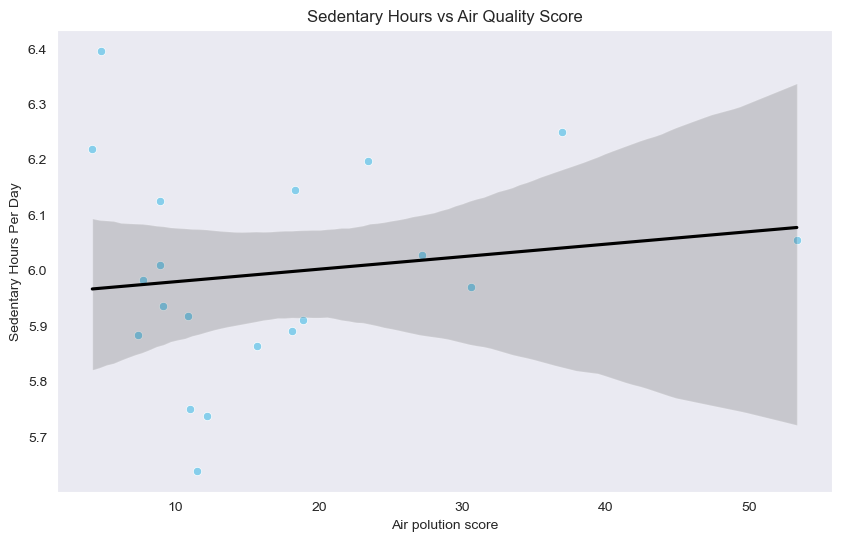

In [128]:
#creating a scatter plot for this:

sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_countries_airq, x="Air quality score", y="Sedentary Hours Per Day", color="skyblue")
sns.regplot(data=merged_countries_airq, x="Air quality score", y="Sedentary Hours Per Day", scatter=False, color="black")  # Adding a trend line cause it was not clear to me at first
plt.title("Sedentary Hours vs Air Quality Score")
plt.xlabel("Air polution score")
plt.ylabel("Sedentary Hours Per Day")
plt.savefig("../Figures/Sedentary Hours vs Air Quality Score.png")

plt.show()


In [69]:
#it's apparent but not super expressive that the worst the air quality, the bigger the sedentarism which makes some sense because people engage less in open air activities

### Let's do sort of the same thing but with data from https://wisevoter.com/country-rankings/happiest-countries-in-the-world/

In [76]:
#1 Scrapping the countries and their happyness indices:
happines_country_url = "https://wisevoter.com/country-rankings/happiest-countries-in-the-world/"
happines_country_request = requests.get(happines_country_url)
happines_country_request
happines_country_request_soup = BeautifulSoup(happines_country_request.content, "html.parser")

In [83]:
#getting the list of countries. 
happiness_countries = happines_country_request_soup.find_all("h3", {"class":"component3-state-names"})
happiness_countries_cleaned = [i.getText().strip() for i in happiness_countries]
happiness_countries_cleaned

['Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Malta

In [91]:
#getting their values:
happiness_countries_scores = happines_country_request_soup.find_all("p", {"class":"description-state-ban-metric-value-label"})
happiness_countries_scores_cleaned = [i.getText().strip() for i in happiness_countries_scores]
happiness_countries_scores_cleaned

['2.4',
 '5.2',
 '5.12',
 '5.97',
 '5.4',
 '7.16',
 '7.16',
 '5.17',
 '6.65',
 '5.16',
 '5.82',
 '6.81',
 '4.62',
 '5.6',
 '5.77',
 '3.47',
 '6.29',
 '5.37',
 '4.67',
 '4.64',
 '5.05',
 '7.03',
 '4.25',
 '6.17',
 '5.78',
 '4.61',
 '6.58',
 '6.13',
 '6.22',
 '6.92',
 '7.64',
 '5.74',
 '5.53',
 '4.29',
 '6.12',
 '6.34',
 '4.4',
 '4.24',
 '7.82',
 '6.69',
 '4.96',
 '4.97',
 '7.03',
 '4.87',
 '5.95',
 '6.26',
 '4.89',
 '6.02',
 '5.43',
 '6.09',
 '7.56',
 '3.78',
 '5.24',
 '4.89',
 '4.94',
 '7.04',
 '7.36',
 '6.47',
 '5.24',
 '5.85',
 '6.04',
 '4.15',
 '6.23',
 '4.54',
 '6.46',
 '6.11',
 '5.83',
 '5.14',
 '6.18',
 '2.96',
 '3.51',
 '5.12',
 '5.33',
 '6.45',
 '7.4',
 '4.34',
 '3.75',
 '5.71',
 '4.48',
 '6.45',
 '4.15',
 '6.07',
 '6.13',
 '5.86',
 '5.76',
 '5.55',
 '5.06',
 '5.05',
 '4.39',
 '4.46',
 '5.38',
 '7.42',
 '7.2',
 '6.17',
 '5',
 '4.55',
 '7.37',
 '4.52',
 '6.31',
 '5.58',
 '5.59',
 '5.56',
 '5.9',
 '6.12',
 '6.02',
 '6.48',
 '5.46',
 '3.27',
 '6.52',
 '5.05',
 '6.18',
 '3.57',
 '6

In [92]:
#into a dictionary so then into a DF:
happiness_countries_dictionary = {"Country":happiness_countries_cleaned, "Happiness score":happiness_countries_scores_cleaned}
happiness_countries_dictionary

{'Country': ['Afghanistan',
  'Albania',
  'Algeria',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Belarus',
  'Belgium',
  'Benin',
  'Bolivia',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'Bulgaria',
  'Burkina Faso',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Chad',
  'Chile',
  'Colombia',
  'Comoros',
  'Costa Rica',
  'Croatia',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Estonia',
  'Eswatini',
  'Ethiopia',
  'Finland',
  'France',
  'Gabon',
  'Georgia',
  'Germany',
  'Ghana',
  'Greece',
  'Guatemala',
  'Guinea',
  'Honduras',
  'Hong Kong',
  'Hungary',
  'Iceland',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Ireland',
  'Israel',
  'Italy',
  'Ivory Coast',
  'Jamaica',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kenya',
  'Kosovo',
  'Kuwait',
  'Kyrgyzstan',
  'Laos',
  'Latvia',
  'Lebanon',
  'Lesotho',
  'Liberia',
  'Libya',


In [103]:
happiness_countries_dataframe = pd.DataFrame(happiness_countries_dictionary)
happiness_countries_dataframe.sample(3)

,Country,Happiness score
126,Togo,4.11
46,Guinea,4.89
97,Pakistan,4.52


## OMFG the united states have a different name again, homies just agree on a name already or change your country's name, this is a hassle for Data Analysts, bitches. 

In [116]:
happiness_countries_dataframe.loc[happiness_countries_dataframe['Country'] == "United States of America",'Country'] = 'United States'

#China too:
happiness_countries_dataframe.loc[happiness_countries_dataframe['Country'] == "People's Republic of China",'Country'] = 'China'

### Actually you know what? I'm invested into knowing what makes people happy. Is it sleeping? Not stressing out?

In [117]:
#grouping by the several things I wanna check against happiness:

grouped_averages = heart_attack_dataframe.groupby("Country")[["Physical Activity Days Per Week", "Sleep Hours Per Day", "Stress Level"]].mean()
grouped_averages.columns = ["Avg. Physical Activity Days Per Week", "Avg. Sleep Hours Per Day", "Avg. Stress Level"]
grouped_averages.sample(3)

,Avg. Physical Activity Days Per Week,Avg. Sleep Hours Per Day,Avg. Stress Level
Country,,,
New Zealand,3.696552,7.103448,5.337931
United States,3.509524,6.926190,5.476190
Japan,3.598152,6.909931,5.491917


In [118]:
#now merging the two:
merged_happiness_countries = pd.merge(grouped_averages, happiness_countries_dataframe, on="Country",how="left")
merged_happiness_countries

,Country,Avg. Physical Activity Days Per Week,Avg. Sleep Hours Per Day,Avg. Stress Level,Happiness score
0,Argentina,3.316348,6.959660,5.681529,5.97
1,Australia,3.311804,7.187082,5.434298,7.16
2,Brazil,3.402597,7.086580,5.285714,6.29
3,Canada,3.477273,7.097727,5.525000,7.03
4,China,3.614679,6.981651,5.529817,5.59
5,Colombia,3.501166,6.972028,5.641026,5.78
6,France,3.495516,7.013453,5.419283,6.69
7,Germany,3.452830,6.968553,5.406709,7.03
8,India,3.550971,7.118932,5.230583,3.78
9,Italy,3.484919,6.907193,5.440835,6.47


In [122]:
#and everything into numbers so I can draw the trendline:
merged_happiness_countries["Avg. Physical Activity Days Per Week"] = pd.to_numeric(merged_happiness_countries["Avg. Physical Activity Days Per Week"], errors="coerce")
merged_happiness_countries["Avg. Sleep Hours Per Day"] = pd.to_numeric(merged_happiness_countries["Avg. Sleep Hours Per Day"], errors="coerce")
merged_happiness_countries["Avg. Stress Level"] = pd.to_numeric(merged_happiness_countries["Avg. Stress Level"], errors="coerce")
merged_happiness_countries["Happiness score"] = pd.to_numeric(merged_happiness_countries["Happiness score"], errors="coerce")

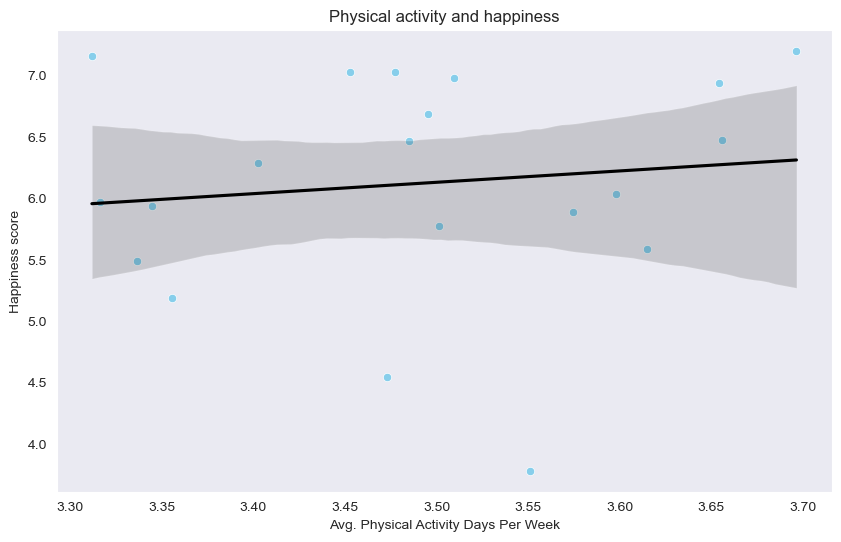

In [129]:
#plotting Avg. Physical Activity Days Per Week vs Happiness
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_happiness_countries, x="Avg. Physical Activity Days Per Week", y="Happiness score", color="skyblue")
sns.regplot(data=merged_happiness_countries, x="Avg. Physical Activity Days Per Week", y="Happiness score", scatter=False, color="black")  
plt.title("Physical activity and happiness")
plt.xlabel("Avg. Physical Activity Days Per Week")
plt.ylabel("Happiness score")
plt.savefig("../Figures/Physical activity and happiness.png")

plt.show()

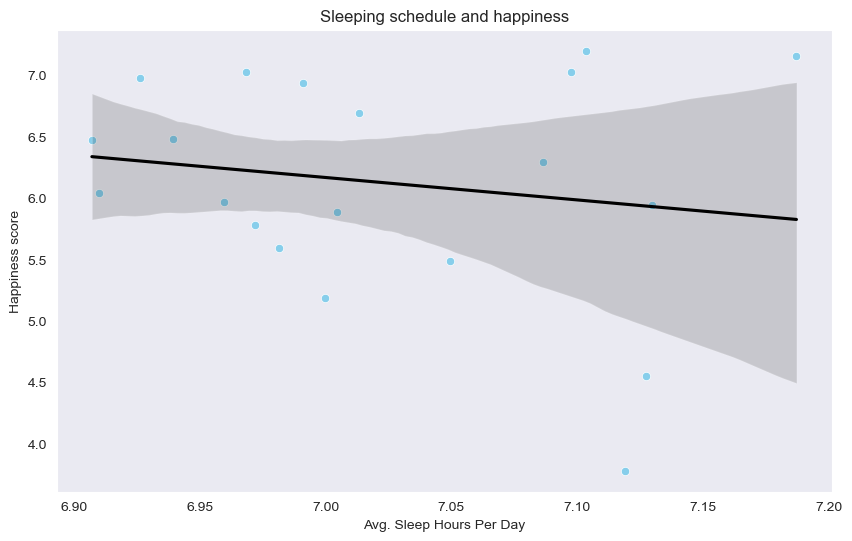

In [131]:
#plotting sleeping schedule vs Happiness
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_happiness_countries, x="Avg. Sleep Hours Per Day", y="Happiness score", color="skyblue")
sns.regplot(data=merged_happiness_countries, x="Avg. Sleep Hours Per Day", y="Happiness score", scatter=False, color="black")  
plt.title("Sleeping schedule and happiness")
plt.xlabel("Avg. Sleep Hours Per Day")
plt.ylabel("Happiness score")
plt.savefig("../Figures/Sleeping schedule and happiness.png")


plt.show()

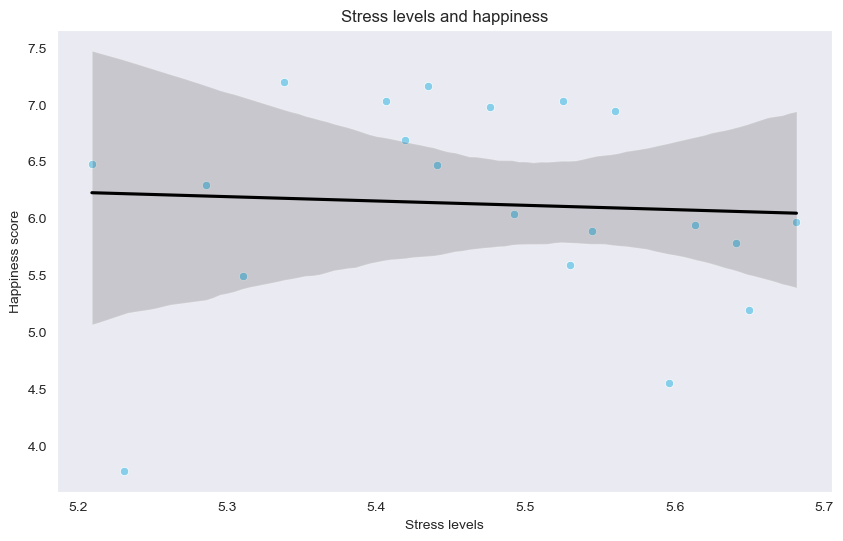

In [132]:
#plotting Avg. Stress Level vs Happiness
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_happiness_countries, x="Avg. Stress Level", y="Happiness score", color="skyblue")
sns.regplot(data=merged_happiness_countries, x="Avg. Stress Level", y="Happiness score", scatter=False, color="black")  
plt.title("Stress levels and happiness")
plt.xlabel("Stress levels")
plt.ylabel("Happiness score")
plt.savefig("../Figures/Stress levels and happiness.png")


plt.show()